In [1]:
##################################################
## 1. Load breast cancer dataset from sklearn
## 2. Split the data as 70:30 as train and test data
## 3. Fit the train data into SVM model with diffferent kernels
##    and bar plot the accuracy of different SVM model with the test data
## 4. Fit the above training dataset into a SVM model with ploynomial kernel
##    with varying degree and plot the accuracy wrt. degree of ploynomial kernel with the test data
## 5. Define a custom kernel K(X,Y)=K*XY'+theta where k and theta are constants
## 6. Use the custom kernel and report the accuracy with the given train and test dataset
##################################################

In [1]:
##################################################
## Basic imports
## You are not required to import additional module imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
import time
from sklearn.preprocessing import PolynomialFeatures
###################################################

In [2]:
###################################################
## the method loads breast cancer dataset and returns
## the dataset and label as X,Y
def load_data(): 
    data_set = datasets.load_breast_cancer()
    X = data_set.data
    y = data_set.target
    return X, y
###################################################

In [3]:
def scale(X):
    return (X - np.mean(X))/np.std(X)

In [4]:
###################################################
## this method takes train and test data and different 
## svm models and fit the train data into svm models and 
## do bar plot using sns.barplot() of different svm model 
## accuracy. You need to implement the model fitting and 
## bar plotting in this method.
def svm_models(X_train, X_test, y_train, y_test, models):
    accuracy = []
    labels = [m.kernel for m in models]

    for model in models:
        model.fit(scale(X_train), y_train)
        accuracy.append(model.score(scale(X_test), y_test))

    fig, ax = plt.subplots()
    fig.set_size_inches(6, 6)

    sns.set(style="ticks")
    ax = sns.barplot(x=labels, y=accuracy, palette="Blues", ax=ax)
    ax.set(xlabel="Kernel Functions", ylabel="Test Accuracy")

    plt.title("Test Accuracy for different kernel SVM (Breast Cancer Dataset)")
    plt.show()
###################################################

In [8]:
###################################################
## this method fits the dataset to a svm model with 
## polynomial kernel with degree varies from 1 to 3 
## and plots the execution time wrt. degree of 
## polynomial, you can calculate the elapsed time 
## by time.time() method
def ploy_kernel_var_deg(X_train, X_test, y_train, y_test):
    times = []
    labels = [i for i in range(1, 4)]

    for i in range(1, 4):
        start_time = time.time()

        svm_ = svm.SVC(kernel="poly", degree=i, gamma="scale", C=1)

        svm_.fit(scale(X_train), y_train)
        score = svm_.score(scale(X_test), y_test)

        times.append((time.time() - start_time))

    fig, ax = plt.subplots()
    fig.set_size_inches(6, 6)

    sns.set(style="ticks")
    ax = sns.lineplot(x=labels, y=times, palette="Blues", ax=ax)
    ax.set(xlabel="Polynomial Degree", ylabel="Execution Times")
    plt.xticks([0, 1, 2, 3, 4])

    plt.title("Execution time vs Polynomial Degree relation for SVM (Polynomial Kernel)")
    plt.show()
###################################################

In [9]:
###################################################
## this method implements a custom kernel technique 
## which is K(X,Y)=k*XY'+theta where k and theta are
## constants. Since SVC supports custom kernel function
## with only 2 parameters we return the custom kernel 
## function name from another method which takes k and
## theta as input
def custom_kernel(k, theta):

    def my_kernel(X, Y):
        return (k*(np.dot(X, Y.T)) + theta)

    return my_kernel
####################################################

In [10]:
####################################################
## this method uses the custom kernel and fit the 
## training data and reports accuracy on test data
def svm_custom_kernel(X_train, X_test, y_train, y_test, model):
    model.fit(scale(X_train), y_train)
    score = model.score(scale(X_test), y_test)

    print("Accuracy score for custom kernel: ", score)
####################################################

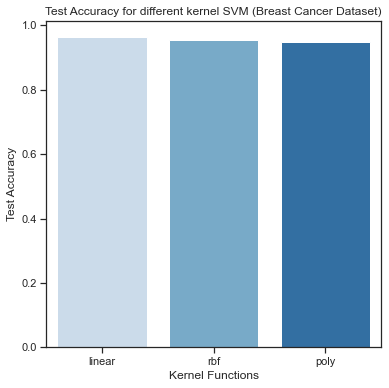

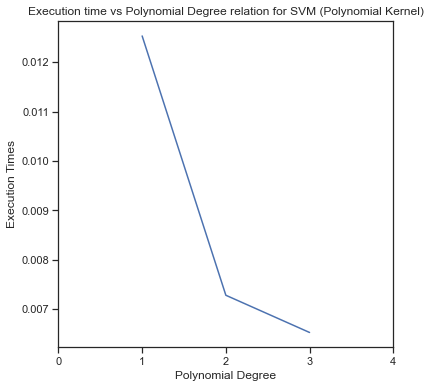

Accuracy score for custom kernel:  0.9590643274853801


In [11]:
####################################################
## main method:
X, y = load_data()
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109) # 70% training and 30% test

C = 1
models = (svm.SVC(kernel='linear', C=C),
          svm.SVC(kernel='rbf', gamma='auto', C=C),
          svm.SVC(kernel='poly', degree=2, gamma='auto', C=C))

svm_models(X_train, X_test, y_train, y_test, models)

ploy_kernel_var_deg(X_train, X_test, y_train, y_test)

k = 0.1
theta = 0.1

model = svm.SVC(kernel=custom_kernel(k,theta))
svm_custom_kernel(X_train, X_test, y_train, y_test, model)
#####################################################